# Numpy基础：数组和矢量计算

http://www.scipy.org/

NumPy是使用Python进行科学计算的基本软件包。它包含以下内容：

强大的N维数组对象

复杂的（广播）功能

集成C / C ++和Fortran代码的工具

有用的线性代数，傅立叶变换和随机数功能

生成一个100000维的list；然后每个元素都做平方处理，计算时间

%time 

In [4]:
my_list = list(range(100000)) 
%time for _ in range(10): my_list2 = [ x**2+10 for x in my_list]

Wall time: 439 ms


In [5]:
%time for _ in range(10): my_list3 = list(x**2+10 for x in my_list)

Wall time: 490 ms


In [6]:
import numpy as np
my_arr = np.arange(100000)
%time for _ in range(10): my_arr2 = my_arr**2+10

Wall time: 15.6 ms


## 本节导航
- 1. NumPy的ndarray：一种多维数组对象
- 2. Numpy通用函数：快速的元素级数组函数
- 3. 利用数组进行数据处理
- 4. 伪随机数
- 5. 简单爬虫

## NumPy的ndarray：一种多维数组对象

In [7]:
import numpy as np

In [8]:
dir(np)

['ALLOW_THREADS',
 'AxisError',
 'BUFSIZE',
 'CLIP',
 'ComplexWarning',
 'DataSource',
 'ERR_CALL',
 'ERR_DEFAULT',
 'ERR_IGNORE',
 'ERR_LOG',
 'ERR_PRINT',
 'ERR_RAISE',
 'ERR_WARN',
 'FLOATING_POINT_SUPPORT',
 'FPE_DIVIDEBYZERO',
 'FPE_INVALID',
 'FPE_OVERFLOW',
 'FPE_UNDERFLOW',
 'False_',
 'Inf',
 'Infinity',
 'MAXDIMS',
 'MAY_SHARE_BOUNDS',
 'MAY_SHARE_EXACT',
 'MachAr',
 'ModuleDeprecationWarning',
 'NAN',
 'NINF',
 'NZERO',
 'NaN',
 'PINF',
 'PZERO',
 'RAISE',
 'RankWarning',
 'SHIFT_DIVIDEBYZERO',
 'SHIFT_INVALID',
 'SHIFT_OVERFLOW',
 'SHIFT_UNDERFLOW',
 'ScalarType',
 'Tester',
 'TooHardError',
 'True_',
 'UFUNC_BUFSIZE_DEFAULT',
 'UFUNC_PYVALS_NAME',
 'VisibleDeprecationWarning',
 'WRAP',
 '_NoValue',
 '_UFUNC_API',
 '__NUMPY_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__config__',
 '__dir__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__git_revision__',
 '__loader__',
 '__mkl_version__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_ad

dir() 函数不带参数时，返回当前范围内的变量、方法和定义的类型列表；带参数时，返回参数的属性、方法列表。如果参数包含方法dir()，该方法将被调用。如果参数不包含dir()，该方法将最大限度地收集参数信息。

In [9]:
dir()

['In',
 'NamespaceMagics',
 'Out',
 '_',
 '_2to3_refactor_cell',
 '_2to3_refactoring_tool',
 '_8',
 '_Jupyter',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_getshapeof',
 '_getsizeof',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_nms',
 '_oh',
 'autopep8',
 'exit',
 'get_ipython',
 'getsizeof',
 'json',
 'lib2to3',
 'my_arr',
 'my_arr2',
 'my_list',
 'my_list2',
 'my_list3',
 'np',
 'quit',
 'var_dic_list']

In [24]:
data = np.random.randn(2,3)
print(data)

[[-0.11228598  1.10288024 -0.27311001]
 [-1.79536428  0.04605846  1.27218979]]


In [25]:
# 对data的每个元素都 *10

print(data*10)

[[ -1.12285983  11.02880241  -2.7311001 ]
 [-17.95364279   0.4605846   12.72189787]]


In [27]:
print('data shape: ', data.shape)
print('data dtype: ', data.dtype)

data shape:  (2, 3)
data dtype:  float64


### 创建数组

#### array()：将Python对象(list/tuple)转换为数组

In [28]:
ls_1 = list(range(4))
ls_1

[0, 1, 2, 3]

In [29]:
arr_1 = np.array(ls_1)
print(arr_1)

[0 1 2 3]


In [30]:
[ls_1, ls_1]

[[0, 1, 2, 3], [0, 1, 2, 3]]

In [31]:
ls_2 = [ls_1]*2
ls_2

[[0, 1, 2, 3], [0, 1, 2, 3]]

In [32]:
arr_2 = np.array(ls_2)
print(arr_2)

[[0 1 2 3]
 [0 1 2 3]]


In [33]:
print(arr_2.ndim)   # 维度

2


In [34]:
print(arr_2.shape)

(2, 4)


In [35]:
# np中每一个元素都是相同的对象

ls_3 = [1, 3, 1.5]
arr_3 = np.array(ls_3)

In [36]:
print(arr_3)

[1.  3.  1.5]


In [37]:
print(arr_3.dtype)

float64


In [38]:
# array的shape都是元组类型

print(np.empty(   (2,3)  )   )

[[0.11228598 1.10288024 0.27311001]
 [1.79536428 0.04605846 1.27218979]]


In [39]:
print(np.empty(2,3))   # 传入的shape必须是一个元组

TypeError: data type not understood

#### zeros(), ones()：创建全为0或1的数组

In [ ]:
arr_0s = np.zeros((2,3), dtype='int32')

In [40]:
help(np.zeros)

Help on built-in function zeros in module numpy:

zeros(...)
    zeros(shape, dtype=float, order='C')
    
    Return a new array of given shape and type, filled with zeros.
    
    Parameters
    ----------
    shape : int or tuple of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: 'C'
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of zeros with the given shape, dtype, and order.
    
    See Also
    --------
    zeros_like : Return an array of zeros with shape and type of input.
    empty : Return a new uninitialized array.
    ones : Return a new array setting values to one.
    full : Return a new array of given shape filled with value.
    
 

In [41]:
np.zeros(5)

array([0., 0., 0., 0., 0.])

In [42]:
np.zeros( (5,))

array([0., 0., 0., 0., 0.])

In [45]:
arr_0s = np.zeros((2,3), dtype='int32')
arr_1s = np.ones((2,4))
print(arr_0s)
print(arr_1s)
print(arr_0s.dtype)
print(arr_1s.dtype)

[[0 0 0]
 [0 0 0]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]
int32
float64


In [46]:
help(np.ones)

Help on function ones in module numpy:

ones(shape, dtype=None, order='C')
    Return a new array of given shape and type, filled with ones.
    
    Parameters
    ----------
    shape : int or sequence of ints
        Shape of the new array, e.g., ``(2, 3)`` or ``2``.
    dtype : data-type, optional
        The desired data-type for the array, e.g., `numpy.int8`.  Default is
        `numpy.float64`.
    order : {'C', 'F'}, optional, default: C
        Whether to store multi-dimensional data in row-major
        (C-style) or column-major (Fortran-style) order in
        memory.
    
    Returns
    -------
    out : ndarray
        Array of ones with the given shape, dtype, and order.
    
    See Also
    --------
    ones_like : Return an array of ones with shape and type of input.
    empty : Return a new uninitialized array.
    zeros : Return a new array setting values to zero.
    full : Return a new array of given shape filled with value.
    
    
    Examples
    --------
   

#### 其他的一些写法

- ones_like(),zeros_like():根据指定的形状和type，创建全1、全0数组
- eye(), diag()：创建对角矩阵
- arange()：通过开始值、终值和步长创建一维数组
- linspace()：通过开始值、终值和元素个数创建一维数组
- logspace()：同上，但创建等比数列  

In [52]:
np.eye(4,3,1)

# k>0 上三角； 
# k<0 下三角

# k 偏移量

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [49]:
np.eye(4,3,-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [55]:
np.eye(7,9,-3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [57]:
np.diag((2,3,4,5.))

array([[2., 0., 0., 0.],
       [0., 3., 0., 0.],
       [0., 0., 4., 0.],
       [0., 0., 0., 5.]])

### 数组的基本属性

- ndim：维度
- shape：各维度大小（元组）
- size：元素个数
- dtype：数据类型

#### dtype指定元素的类型

In [65]:
arr1 = np.array(range(10), dtype='c8')
print(arr1, arr1.dtype, sep='\n')

# c: complex复数
# 8：64   16：128    数字表示字节

[0.+0.j 1.+0.j 2.+0.j 3.+0.j 4.+0.j 5.+0.j 6.+0.j 7.+0.j 8.+0.j 9.+0.j]
complex64


In [70]:
arr2 = np.array(range(10), dtype='f4')
print(arr2, arr2.dtype, sep='\n')

# f2 ：float16， 半精度
# f4： float32， 单精度，f
# f8： float64， 双精度，d
# f16： g  与C++兼容

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
float32


In [72]:
2**7

128

In [75]:
arr3 = np.array(range(255,260), dtype = 'i1')

#  写出结果
print(arr3)   # 溢出

# i：有符号；  u：无符号
# i1： int8     i2: int16

[-1  0  1  2  3]


#### astype: 转换数组元素类型

In [77]:
arr_4 = np.array(range(5))
print(arr_4, arr_4.dtype)

float_arr_4  = arr_4.astype('f8')
print(float_arr_4 ,float_arr_4 .dtype)

[0 1 2 3 4] int32
[0. 1. 2. 3. 4.] float64


In [80]:
# - 将浮点数转换成整数，则小数部分将会被截取删除
arr_5 = arr_4 + arr_4/10
print(arr_5, arr_5.dtype)

int_arr5 = arr_5.astype('i4')
print(int_arr5 , int_arr5 .dtype)

[0.  1.1 2.2 3.3 4.4] float64
[0 1 2 3 4] int32


In [82]:
arr_strs = np.array(['1.25', '-3.56', '0.4541'], dtype=np.string_)
print(arr_strs,arr_strs.dtype)

float_arr_strs = arr_strs.astype(float)
print(float_arr_strs,float_arr_strs.dtype)

[b'1.25' b'-3.56' b'0.4541'] |S6
[ 1.25   -3.56    0.4541] float64


#### reshape

In [96]:
arr_5  = np.array(range(9))
print(arr_5)

reshape_arr5 = arr_5.reshape(3,3)
print(reshape_arr5)

reshape_arr6 = arr_5.reshape((3,3))   # 推荐
print(reshape_arr6)

print(arr_5)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


In [87]:
# 调用reshape，会变化； 有返回值的

arr_5[0] = 99
print("arr_5: \n", arr_5)

print("reshape_arr5 : \n", reshape_arr5 )


arr_5: 
 [99  1  2  3  4  5  6  7  8]
reshape_arr5 : 
 [[99  1  2]
 [ 3  4  5]
 [ 6  7  8]]


In [88]:
reshape_arr5[0][0] = 999
print("arr_5: \n", arr_5)

print("reshape_arr5 : \n", reshape_arr5 )

arr_5: 
 [999   1   2   3   4   5   6   7   8]
reshape_arr5 : 
 [[999   1   2]
 [  3   4   5]
 [  6   7   8]]


####  -1

In [89]:
reshape_arr5.reshape((-1,3))


# -1 推理出来的

array([[999,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

In [90]:
reshape_arr5.reshape((2, -1))   # 必须要推理成功

ValueError: cannot reshape array of size 9 into shape (2,newaxis)

####  shape 数组本身改变


In [93]:
arr_5 = np.array(range(9))
print(arr_5)

arr_5.shape = (3,3)
print(arr_5.shape)
print(arr_5)

[0 1 2 3 4 5 6 7 8]
(3, 3)
[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### resizie

In [97]:
arr_5 = np.array(range(9))
print(arr_5)


resize_arr5 = arr_5.resize(3,3)
print(resize_arr5)
print(arr_5)

# resize是没有返回值的， 改变的是数组本身
# reshape有返回值的，不改变原数组

[0 1 2 3 4 5 6 7 8]
None
[[0 1 2]
 [3 4 5]
 [6 7 8]]


####  ravel 扁平化操作

In [99]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print(arr_5)




[[0 1 2]
 [3 4 5]
 [6 7 8]]


In [100]:
ravel_arr5 = arr_5.ravel()
print(ravel_arr5)

[0 1 2 3 4 5 6 7 8]


In [102]:
arr_5[0][0] = 999

print(ravel_arr5)

# ravel会改变数据本身

[999   1   2   3   4   5   6   7   8]


#### flatten扁平化

In [103]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print(arr_5)

flatten_arr5 = arr_5.flatten()
print(flatten_arr5)

# flatten 扁平化  依然是数据本身

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[0 1 2 3 4 5 6 7 8]


In [104]:
arr_5[0][0] = 66
print(arr_5)
print(flatten_arr5)

[[66  1  2]
 [ 3  4  5]
 [ 6  7  8]]
[0 1 2 3 4 5 6 7 8]


### numpy数组的运算


In [111]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print(arr_5)

print(arr_5 * arr_5)  
print(arr_5 **2)

# 比较list， 2层for loop
# numpy的优势

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]
[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


In [109]:
# numpy对标量的算术运算会传播到每一个元素中

arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print(arr_5+100)
print(arr_5/10)



[[100 101 102]
 [103 104 105]
 [106 107 108]]
[[0.  0.1 0.2]
 [0.3 0.4 0.5]
 [0.6 0.7 0.8]]


In [110]:
print(arr_5 == arr_5**2)

[[ True  True False]
 [False False False]
 [False False False]]


## 广播 broadcast

numpy中元素不一样的时候，同样可以进行操作

较小的数组可以变为较大的数组（同维）

In [114]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0,2.0,3.0]) 
print ('数组a：\n',a)  
print ('数组b：\n',b)  

print(a+b)  # 广播

数组a：
 [[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
数组b：
 [1. 2. 3.]
[[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


In [116]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0]) 
print ('数组a：\n',a)  
print ('数组b：\n',b)  
print(a+b)

数组a：
 [[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
数组b：
 [1.]
[[ 1.  1.  1.]
 [11. 11. 11.]
 [21. 21. 21.]
 [31. 31. 31.]]


In [118]:
a = np.array([[0.0,0.0,0.0,0.0],[10.0,10.0,10.0,10.0],[20.0,20.0,20.0,20.0],[30.0,30.0,30.0,30.0]]) 

b = np.array([1.0, 2.0])


print ('数组a：\n',a)  
print ('数组b：\n',b)  
print(a+b)

# 广播： 能够的话，不报错； 不能广播才报错

数组a：
 [[ 0.  0.  0.  0.]
 [10. 10. 10. 10.]
 [20. 20. 20. 20.]
 [30. 30. 30. 30.]]
数组b：
 [1. 2.]


ValueError: operands could not be broadcast together with shapes (4,4) (2,) 

广播规则:

- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐
- 输出数组的shape是输入数组shape的各个轴上的最大值
- 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错
- 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值

## 索引和切片

### 一维数组的处理

In [120]:
arr = np.array(range(10))

arr_slice = arr[3:6]   # 左闭右开

print(arr, arr_slice, sep='\n')

[0 1 2 3 4 5 6 7 8 9]
[3 4 5]


In [121]:
ls = list(range(10))
ls_slice = ls[3:6]
print(ls, ls_slice, sep='\n')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[3, 4, 5]


In [122]:
arr_slice[0] = 999
ls_slice[0] = 999

print(arr, arr_slice, sep='\n')   # 数组的切片，改变的是本身

print(ls, ls_slice, sep='\n')

[  0   1   2 999   4   5   6   7   8   9]
[999   4   5]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[999, 4, 5]


In [123]:
# [ : ]  对所有元素数组改变的就是本身

arr_slice[:] = 0  # 数组改变的就是本身
print(arr, arr_slice, sep='\n') 

[0 1 2 0 0 0 6 7 8 9]
[0 0 0]


In [126]:
arr = np.array(range(10))

arr_slice2 = arr[3:6].copy()   #内存中的另外一个副本，使用copy

arr_slice2[:] = 0
print(arr, arr_slice, sep='\n') 


[0 1 2 3 4 5 6 7 8 9]
[0 0 0]


### 高维数组的处理

In [128]:
ls = [list(range(5)), list(range(5))]

ls

[[0, 1, 2, 3, 4], [0, 1, 2, 3, 4]]

In [130]:
ls[0][2]

2

In [131]:
ls[0,2]  # wrong

TypeError: list indices must be integers or slices, not tuple

In [133]:
arr = np.array(ls)

arr

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [134]:
arr[0][2]

2

In [135]:
arr[0,2]  # numpy中，等价的两种写法

2

In [136]:
arr[0,2 :]

array([2, 3, 4])

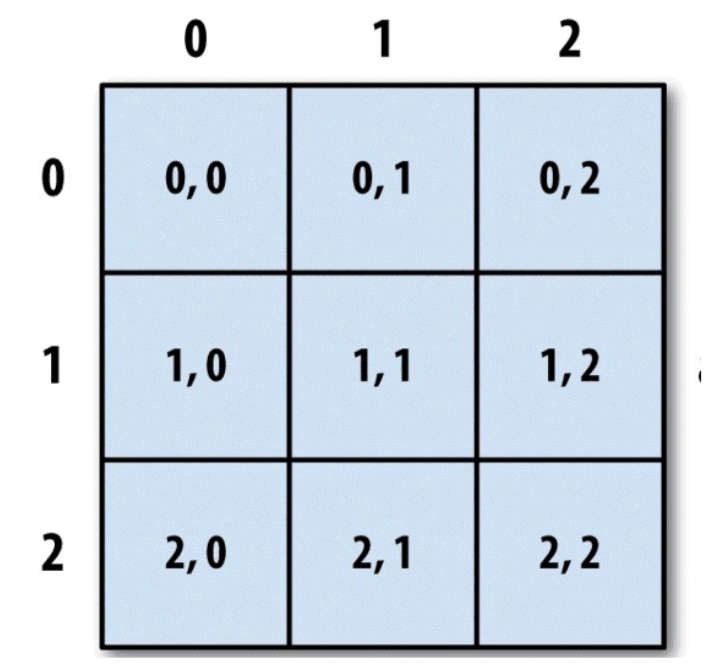

In [138]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [139]:
arr3d.shape

(2, 2, 3)

In [140]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


In [141]:
print(arr3d[0][0])

[1 2 3]


In [142]:
print(arr3d[0][0][0])

1


- 标量值和数组都可以被赋值给数组


In [149]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
old_values = arr3d[0].copy()
print(old_values)


arr3d[0] = 42
print(arr3d)

print('===========分割线============',end='\n\n\n')

arr3d[0] = old_values
print(arr3d)

[[1 2 3]
 [4 5 6]]
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
===========分割线============


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


### 布尔型索引


In [150]:
strs = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

data = np.random.randn(7,4)

print(strs, data, sep="\n")

['a' 'b' 'c' 'd' 'e' 'f' 'g']
[[ 0.79025741  0.82305429 -0.40120658  0.83646538]
 [-0.51715452 -0.12970518 -0.82108482  2.16782887]
 [-0.55735407  1.54508007  0.80338205  0.99376125]
 [-0.50166253 -0.12653306 -1.24888204  0.43724357]
 [-2.2261703  -0.67917469  0.080971    0.41637761]
 [ 1.25561204 -0.35069408 -0.89381008 -0.12208363]
 [ 0.06171905 -0.31494177  1.7555791   0.2087413 ]]


In [151]:
print(data>0)   # 传播到每一个元素中

[[ True  True False  True]
 [False False False  True]
 [False  True  True  True]
 [False False False  True]
 [False False  True  True]
 [ True False False False]
 [ True False  True  True]]


假设每一个字母对应一行，取出c对应的array

In [153]:
strs = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
print(strs == 'c')

[False False  True False False False False]


In [155]:
print(data[ strs == 'c' ])

# print(data[strs.index('c')])  # wrong

[[-0.55735407  1.54508007  0.80338205  0.99376125]]


In [156]:
print(data[strs=='a', 2:])

[[-0.40120658  0.83646538]]


作业：

strs = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])

随机生成一个7*6的数组

假设每一个字母对应一行

要求：除了字母d对应的那行，打印剩下的数组

有两种写法 都试一下

# 通用函数

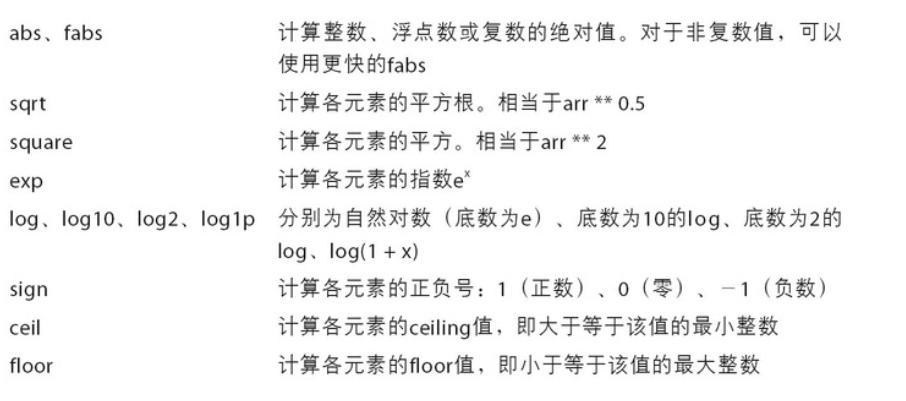

一元函数

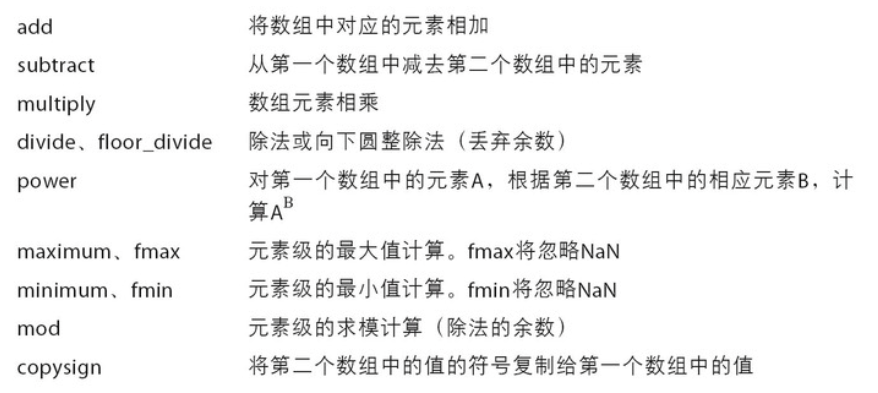

二元函数